In [19]:
import cv2 as cv
import numpy as np

def histEqualization(img):
    grey = img[:,:,0] # all channels in greyscale image is same
    height = img.shape[0]
    width = img.shape[1]

    #calculate frequency of elements using numpy array
    uni,freq = np.unique(grey,return_counts = True)

    pdf = freq/(height*width) #calculating probability of unique frequencies
    cdf = np.cumsum(pdf) 
    result = np.round(254 * cdf)
    
    size = uni.shape[0]
    for i in range(size):
        grey[grey == uni[i]] = result[i] #map the old intensities to the new intensity range

    grey = np.stack((grey,grey,grey),axis=2) #stacking the channels together
    return grey


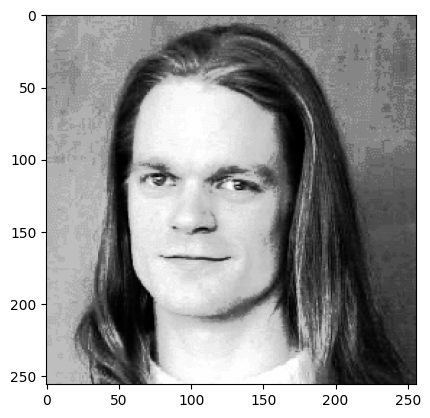

In [20]:
import matplotlib.pyplot as plt
import os

os.chdir("../images")
img = cv.imread("../images/low.png")
result = histEqualization(img)

cv.imwrite("high.png",result)
plt.imshow(result)